# What is Employee Turnover?
### Employee Turnover or Employee Turnover ratio is the measurement of the total number of employees who leave an organization in a particular year. Employee Turnover Prediction means to predict whether an employee is going to leave the organization in the coming period.

### A Company uses this predictive analysis to measure how many employees they will need if the potential employees will leave their organization. A company also uses this predictive analysis to make the workplace better for employees by understanding the core reasons for the high turnover ratio.

# Çalışan Devir Hızı Nedir?
### Çalışan Devir Hızı veya Çalışan Devir Hızı oranı, belirli bir yılda bir kuruluştan ayrılan toplam çalışan sayısının ölçümüdür. Çalışan Devir Hızı Tahmini, bir çalışanın önümüzdeki dönemde kurumdan ayrılıp ayrılmayacağını tahmin etmek anlamına gelir.

### Bir Şirket, bu tahmine dayalı analizi, potansiyel çalışanların kuruluşlarından ayrılması durumunda kaç çalışana ihtiyaç duyacağını ölçmek için kullanır. Bir şirket ayrıca, yüksek ciro oranının temel nedenlerini anlayarak işyerini çalışanlar için daha iyi hale getirmek için bu tahmine dayalı analizi kullanır.

# Data Preprocessing

In [1]:
import pandas as pd

In [2]:
hr = pd.read_csv('hr.csv')

In [3]:
col_names = hr.columns.tolist()

In [4]:
print("Column names:")
print(col_names)
print("\nSample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#Rename column name from “sales” to “department”:
hr=hr.rename(columns = {'sales':'department'})

In [6]:
#Our data is pretty clean, with no missing values, so let’s move further and see how many employees work in the organization:
hr.shape

(14999, 10)

#### The “left” column is the outcome variable recording one and 0. 1 for employees who left the company and 0 for those who didn’t.

#### The department column of the dataset has many categories, and we need to reduce the categories for better modelling. Let’s see all the categories of the department column:

#### "Sol" sütunu, şirketten ayrılan çalışanlar için 1 ve 0, ayrılmayanlar için 0 kaydeden sonuç değişkenidir.

#### Veri kümesinin departman sütununda birçok kategori var ve daha iyi modelleme için kategorileri azaltmamız gerekiyor. Bölüm sütununun tüm kategorilerini görelim:

In [7]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

#### Let’s add all the “technical”, “support” and “IT” columns into one column to make our analysis easier.

#### Analizimizi kolaylaştırmak için tüm "teknik", "destek" ve "BT" sütunlarını tek bir sütuna ekleyelim.

# Creating Variables for Categorical Variables

#### As there are two categorical variables (department, salary) in the dataset and they need to be converted to dummy variables before they can be used for modelling.

#### Veri setinde iki kategorik değişken (departman, maaş) olduğundan ve modelleme için kullanılmadan önce kukla değişkenlere dönüştürülmesi gerekir.

In [8]:
cat_vars=['department','salary']

In [9]:
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

#### Now the actual variables need to be removed after the dummy variable have been created. Column names after creating dummy variables for categorical variables:

#### Şimdi, kukla değişken oluşturulduktan sonra gerçek değişkenlerin kaldırılması gerekiyor. Kategorik değişkenler için kukla değişkenler oluşturduktan sonra sütun adları:

In [10]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)

In [11]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_IT',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

In [1]:
#The outcome variable is “left”, and all the other variables are predictors.
#Sonuç değişkeni “sol” ve diğer tüm değişkenler tahmin edicidir.

In [51]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

# Feature Selection for Employee Turnover Prediction

#### Let’s use the feature selection method to decide which variables are the best option that can predict employee turnover with great accuracy. There are a total of 18 columns in X, and now let’s see how we can select about 10 from them:

#### Hangi değişkenlerin çalışan devrini büyük bir doğrulukla tahmin edebilecek en iyi seçenek olduğuna karar vermek için özellik seçim yöntemini kullanalım. X'te toplam 18 sütun var ve şimdi bunlardan 10 tanesini nasıl seçebileceğimize bakalım:

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True  True  True False  True False  True  True
 False False False False False  True  True False]
[ 1  1  3 10  1  1  1  4  1  8  1  1 11  5  9  7  6  1  1  2]


#### You can see that or feature selection chose the 10 variables for us, which are marked True in the support_ array and marked with a choice “1” in the ranking_array. Now lets have a look at these columns:

#### Özellik seçiminin bizim için support_ dizisinde True olarak işaretlenen ve rank_array'de "1" seçeneğiyle işaretlenen 10 değişkeni seçtiğini görebilirsiniz. Şimdi bu sütunlara bir göz atalım:

In [53]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 

In [54]:
X=hr[cols]

In [55]:
y=hr['left']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [59]:
logreg = LogisticRegression()


In [60]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [61]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.771


# Random Forest Classification Model

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier()

In [64]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.978


# Confusion Matrix for our Machine Learning Models

### Now I will construct a confusion matrix to visualize predictions made by our classifier and evaluate the accuracy of our machine learning classification.

### Şimdi sınıflandırıcımız tarafından yapılan tahminleri görselleştirmek ve makine öğrenimi sınıflandırmamızın doğruluğunu değerlendirmek için bir karışıklık matrisi oluşturacağım.

#### Random Forest

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.95      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



In [68]:
y_pred = rf.predict(X_test)

In [72]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Random Forest')

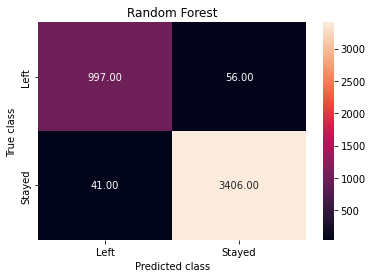

In [85]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
forest_cm =metrics.confusion_matrix(y_pred, y_test, labels=[1,0])
#forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

#### Logistic Regression

In [86]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.51      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



Text(0.5, 1.0, 'Logistic Regression')

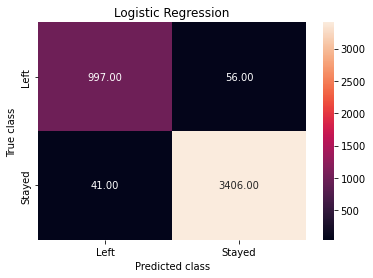

In [89]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm =metrics.confusion_matrix(y_pred, y_test, labels=[1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

# Employee Turnover Prediction Curve

In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [91]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

In [93]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))

In [94]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

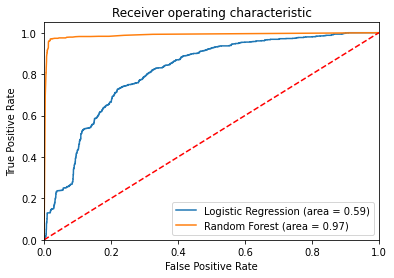

In [95]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### The receiver operating characteristic (ROC) curve is a standard tool used with binary classifiers. The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

#### So, as we can see that the Random Forest Model has proven to be more useful in the prediction of employee turnover, now let’s have a look at the feature importance of our random forest classification model.

#### Alıcı işletim karakteristiği (ROC) eğrisi, ikili sınıflandırıcılarla kullanılan standart bir araçtır. Kırmızı noktalı çizgi, tamamen rastgele bir sınıflandırıcının ROC eğrisini temsil eder; iyi bir sınıflandırıcı bu çizgiden mümkün olduğunca uzak durur (sol üst köşeye doğru).

#### Rastgele Orman Modeli'nin çalışan devir hızı tahmininde daha faydalı olduğunu gördüğümüze göre, şimdi rastgele orman sınıflandırma modelimizin özellik önemine bir göz atalım.

In [98]:
import numpy as np
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])

In [99]:
importance = rf.feature_importances_

In [100]:
feature_indexes_by_importance = importance.argsort()

In [101]:
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years-0.23%
department_management-0.26%
department_hr-0.27%
department_RandD-0.33%
salary_high-0.63%
salary_low-1.16%
Work_accident-1.42%
last_evaluation-18.54%
time_spend_company-27.35%
satisfaction_level-49.81%


#### According to our Random Forest classification model, the above aspects show the most important features which will influence whether an employee will leave the company, in ascending order.

#### Rastgele Orman sınıflandırma modelimize göre, yukarıdaki hususlar, bir çalışanın şirketten ayrılıp ayrılmayacağını etkileyecek en önemli özellikleri artan sırada gösterir.